In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.option_context('display.max_rows', 10000, 'display.max_columns', 200)
import seaborn as sns
import glob


In [29]:
df = pd.read_csv("../2nd batch-50K-After labeling/data12.csv")

In [30]:
df



,msisdn,termination_flag,tenure,gross_adds_flag,active_flag,line_status,pkg_segment,pkg_type,post_flag,sales_channel_type,city,device_manufacturer,device_type,device_tech,top_intl_destination,nationality,ranking,mou_out,mou_out_onnet,mou_out_onnet_chrgd,mou_out_offnet,mou_out_offnet_chrgd,mou_out_three_average,mou_out_onnet_three_average,mou_out_onnet_chrgd_three_average,mou_out_offnet_three_average,mou_out_offnet_chrgd_three_average,mou_in_onnet,mou_in_offnet,count_voice_total,count_voice_out_intl,count_voice_total_three_average,count_voice_out_intl_three_add,mou_out_intl_three_average,mou_out_intl_chrgd_three_average,mou_in_intl_three_average,mou_out_roaming_three_average,mou_out_roaming_chrgd_three_average,sms_total,sms_total_three_average,dou,dou_chrgd,dou_three_average,dou_chrgd_three_average,revenue_data,revenue_voice,revenue_voice_onnet,revenue_voice_offnet,revenue_data_three_average,revenue_voice_three_average,revenue_voice_onnet_three_average,revenue_voice_offnet_three_average,revenue_out_voice,revenue_out_voice_onnet,revenue_out_voice_offnet,revenue_intl_out_three_average,revenue_out_voice_three_average,revenue_out_voice_onnet_three_average,revenue_out_voice_offnet_three_average,revenue_sms,revenue_vas,revenue_pkg_out,revenue_sms_three_average,revenue_vas_three_average,revenue_pkg_out_three_average,revenue_pkg,revenue_total,revenue_total_three_average,count_complaints_three_add,count_internet_issues,count_can_not_use_the_benefits,count_billed_dispute,count_can_not_make_calls,count_coverage_issues,count_can_not_receive_sms,count_can_not_migrate_post_packages,count_unbilled_dispute,count_can_not_receive_calls,count_other,pkg_fee,pkg_voice_local,pkg_data,pkg_data_social,pkg_voice_roaming_flag,pkg_data_roaming_flag,pkg_unlimit_voice_flag,pkg_unlimit_data_flag,pkg_fee_minus,pkg_discount,Day_last_pay,label
0,50666XTRA,0,64.16129,0,1,Connected,Consumer,Voice,1,-1,Madinah,Apple,Phablet,4G,UNKNOWN,Syria,VERY-GOOD,5768,4301,0,1467,215,0,0,0,0,0,3552,2333,31,0,0,0,0,0,0,0,0,0,0,5678.5513,0.0,0.0,0.0,0.0,1.2,0.0,1.2,0.0,0.0,0.0,0.0,1.2,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.00,1.20,0.0,0.0,0.0,140.0,141.20,0.0,0,0,0,0,0,0,0,0,0,0,0,140.0,1500.0,10.0,-1.0,0,1,0,0,0.0,\N,NaN,0.0
1,5066T8T6N,0,56.935482,0,1,Connected,Consumer,Voice,1,FBO,NaN,Apple,Phablet,4G,UNKNOWN,Saudi Arabia,GOOD,14945,10842,0,4103,0,0,0,0,0,0,8789,8279,31,0,0,0,0,0,0,0,0,7451,0,68218.9600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,199.0,199.00,0.0,0,0,0,0,0,0,0,0,0,0,0,199.0,-1.0,95.0,-1.0,0,1,1,0,0.0,\N,NaN,0.0
2,50688QNQN,0,29.258064,0,1,Connected,Consumer,Voice,1,FBO,NaN,Apple,Phablet,4G,UNKNOWN,Saudi Arabia,VERY-GOOD,14689,1248,0,13441,2657,0,0,0,0,0,699,16591,31,0,0,0,0,0,0,0,0,536,0,56123.1000,0.0,0.0,0.0,0.0,14.1,0.0,14.1,0.0,0.0,0.0,0.0,14.1,0.0,14.1,0.0,0.0,0.0,0.0,0.0,0.00,14.10,0.0,0.0,0.0,199.0,213.10,0.0,0,0,0,0,0,0,0,0,0,0,0,199.0,-1.0,100.0,-1.0,0,1,1,0,0.0,\N,NaN,0.0
3,5068TTXX8,0,3.064516,0,1,Connected,Consumer,Voice,1,FBO,Qatif,Samsung,Phablet,4G,UNKNOWN,Saudi Arabia,GOOD,15178,5997,0,9181,0,0,0,0,0,0,2965,13978,31,1,0,0,0,0,0,0,0,0,0,6775.0947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.37,8.77,0.0,0.0,0.0,59.0,67.77,0.0,0,0,0,0,0,0,0,0,0,0,0,59.0,500.0,4.0,5.0,0,1,0,0,0.0,\N,NaN,0.0
4,506AR6RYY,0,38.451614,0,1,Connected,Consumer,Voice,1,FBO,Jeddah,Apple,Phablet,4G,UNKNOWN,Saudi Arabia,VERY-GOOD,35561,5314,0,30247,0,0,0,0,0,0,7796,37058,31,0,0,0,0,0,0,0,0,0,0,4157.3115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,149.0,149.00,0.0,0,0,0,0,0,0,0,0,0,0,0,149.0,2000.0,20.0,-1.0,0,1,0,0,0.0,\N,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [31]:
all_columns_dic = {}
for i in df.columns:
    all_columns_dic[i] = True
print(all_columns_dic)

{'msisdn': True, 'termination_flag': True, 'tenure': True, 'gross_adds_flag': True, 'active_flag': True, 'line_status': True, 'pkg_segment': True, 'pkg_type': True, 'post_flag': True, 'sales_channel_type': True, 'city': True, 'device_manufacturer': True, 'device_type': True, 'device_tech': True, 'top_intl_destination': True, 'nationality': True, 'ranking': True, 'mou_out': True, 'mou_out_onnet': True, 'mou_out_onnet_chrgd': True, 'mou_out_offnet': True, 'mou_out_offnet_chrgd': True, 'mou_out_three_average': True, 'mou_out_onnet_three_average': True, 'mou_out_onnet_chrgd_three_average': True, 'mou_out_offnet_three_average': True, 'mou_out_offnet_chrgd_three_average': True, 'mou_in_onnet': True, 'mou_in_offnet': True, 'count_voice_total': True, 'count_voice_out_intl': True, 'count_voice_total_three_average': True, 'count_voice_out_intl_three_add': True, 'mou_out_intl_three_average': True, 'mou_out_intl_chrgd_three_average': True, 'mou_in_intl_three_average': True, 'mou_out_roaming_three_

In [32]:
all_columns_dic["msisdn"] = False
# there are some \\N values in active_flag df[df["active_flag"]=="\\N"]
all_columns_dic["line_status"] = False #bcz labels are created from this column
all_columns_dic["pkg_segment"] = False #Same value in all rows
all_columns_dic["pkg_type"] = False #Same value in all rows
all_columns_dic["post_flag"] = False #Same value in all rows
all_columns_dic["Day_last_pay"] = False #Blank in all data files



"""
    Nominal Features: 
        - sales_channel_type
        - city
        - device_manufacturer
        - device_type
        - device_tech
        - top_intl_destination
        - nationality
    Ordinal Features: 
        - ranking
"""
all_columns_dic


{'msisdn': False,
 'termination_flag': True,
 'tenure': True,
 'gross_adds_flag': True,
 'active_flag': True,
 'line_status': False,
 'pkg_segment': False,
 'pkg_type': False,
 'post_flag': False,
 'sales_channel_type': True,
 'city': True,
 'device_manufacturer': True,
 'device_type': True,
 'device_tech': True,
 'top_intl_destination': True,
 'nationality': True,
 'ranking': True,
 'mou_out': True,
 'mou_out_onnet': True,
 'mou_out_onnet_chrgd': True,
 'mou_out_offnet': True,
 'mou_out_offnet_chrgd': True,
 'mou_out_three_average': True,
 'mou_out_onnet_three_average': True,
 'mou_out_onnet_chrgd_three_average': True,
 'mou_out_offnet_three_average': True,
 'mou_out_offnet_chrgd_three_average': True,
 'mou_in_onnet': True,
 'mou_in_offnet': True,
 'count_voice_total': True,
 'count_voice_out_intl': True,
 'count_voice_total_three_average': True,
 'count_voice_out_intl_three_add': True,
 'mou_out_intl_three_average': True,
 'mou_out_intl_chrgd_three_average': True,
 'mou_in_intl_three

In [33]:
print(len(df["Day_last_pay"].unique()))
df["Day_last_pay"].unique()


1


array([nan])

In [34]:
df[df["mou_out_onnet_chrgd"].isna()]

,msisdn,termination_flag,tenure,gross_adds_flag,active_flag,line_status,pkg_segment,pkg_type,post_flag,sales_channel_type,city,device_manufacturer,device_type,device_tech,top_intl_destination,nationality,ranking,mou_out,mou_out_onnet,mou_out_onnet_chrgd,mou_out_offnet,mou_out_offnet_chrgd,mou_out_three_average,mou_out_onnet_three_average,mou_out_onnet_chrgd_three_average,mou_out_offnet_three_average,mou_out_offnet_chrgd_three_average,mou_in_onnet,mou_in_offnet,count_voice_total,count_voice_out_intl,count_voice_total_three_average,count_voice_out_intl_three_add,mou_out_intl_three_average,mou_out_intl_chrgd_three_average,mou_in_intl_three_average,mou_out_roaming_three_average,mou_out_roaming_chrgd_three_average,sms_total,sms_total_three_average,dou,dou_chrgd,dou_three_average,dou_chrgd_three_average,revenue_data,revenue_voice,revenue_voice_onnet,revenue_voice_offnet,revenue_data_three_average,revenue_voice_three_average,revenue_voice_onnet_three_average,revenue_voice_offnet_three_average,revenue_out_voice,revenue_out_voice_onnet,revenue_out_voice_offnet,revenue_intl_out_three_average,revenue_out_voice_three_average,revenue_out_voice_onnet_three_average,revenue_out_voice_offnet_three_average,revenue_sms,revenue_vas,revenue_pkg_out,revenue_sms_three_average,revenue_vas_three_average,revenue_pkg_out_three_average,revenue_pkg,revenue_total,revenue_total_three_average,count_complaints_three_add,count_internet_issues,count_can_not_use_the_benefits,count_billed_dispute,count_can_not_make_calls,count_coverage_issues,count_can_not_receive_sms,count_can_not_migrate_post_packages,count_unbilled_dispute,count_can_not_receive_calls,count_other,pkg_fee,pkg_voice_local,pkg_data,pkg_data_social,pkg_voice_roaming_flag,pkg_data_roaming_flag,pkg_unlimit_voice_flag,pkg_unlimit_data_flag,pkg_fee_minus,pkg_discount,Day_last_pay,label


In [35]:
df.describe()

,termination_flag,gross_adds_flag,post_flag,mou_out,mou_out_onnet,mou_out_onnet_chrgd,mou_out_offnet,mou_out_offnet_chrgd,mou_out_three_average,mou_out_onnet_three_average,mou_out_onnet_chrgd_three_average,mou_out_offnet_three_average,mou_out_offnet_chrgd_three_average,mou_in_onnet,mou_in_offnet,count_voice_total,count_voice_out_intl,count_voice_total_three_average,count_voice_out_intl_three_add,mou_out_intl_three_average,mou_out_intl_chrgd_three_average,mou_in_intl_three_average,mou_out_roaming_three_average,mou_out_roaming_chrgd_three_average,sms_total,sms_total_three_average,dou,dou_chrgd,dou_three_average,dou_chrgd_three_average,revenue_data,revenue_voice,revenue_voice_onnet,revenue_voice_offnet,revenue_data_three_average,revenue_voice_three_average,revenue_voice_onnet_three_average,revenue_voice_offnet_three_average,revenue_out_voice,revenue_out_voice_onnet,revenue_out_voice_offnet,revenue_intl_out_three_average,revenue_out_voice_three_average,revenue_out_voice_onnet_three_average,revenue_out_voice_offnet_three_average,revenue_sms,revenue_vas,revenue_pkg_out,revenue_sms_three_average,revenue_vas_three_average,revenue_pkg_out_three_average,revenue_pkg,revenue_total,revenue_total_three_average,count_complaints_three_add,count_internet_issues,count_can_not_use_the_benefits,count_billed_dispute,count_can_not_make_calls,count_coverage_issues,count_can_not_receive_sms,count_can_not_migrate_post_packages,count_unbilled_dispute,count_can_not_receive_calls,count_other,pkg_fee,pkg_voice_roaming_flag,pkg_data_roaming_flag,pkg_unlimit_voice_flag,pkg_unlimit_data_flag,pkg_fee_minus,Day_last_pay,label
count,38077.000000,38077.000000,38077.0,3.807700e+04,38077.000000,38077.000000,3.807700e+04,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.0,38077.000000,3.807700e+04,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.000000,38077.0,3.807700e+04,38077.000000,38077.0,38077.0,38077.000000,38077.000000,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.000000,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.000000,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.000000,38077.0,38077.0,38077.000000,38077.000000,38077.000000,0.0,38077.000000
mean,0.019960,0.000289,1.0,2.409600e+04,5654.138430,107.747065,1.806278e+04,708.007065,0.0,0.0,0.0,0.0,0.0,4344.668409,2.183369e+04,28.006513,3.763873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.004044,0.0,2.756212e+04,0.085980,0.0,0.0,0.753487,9.005804,0.799156,4.535008,0.0,0.0,0.0,0.0,8.825807,0.774014,4.393722,0.0,0.0,0.0,0.0,3.637813,18.188775,28.720052,0.0,0.0,0.0,172.305092,201.184724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.384957,0.0,1.0,0.324133,0.021299,9.079864,NaN,0.057568
std,0.139863,0.016994,0.0,3.383151e+04,12953.387697,1098.539819,2.813483e+04,3515.940439,0.0,0.0,0.0,0.0,0.0,10758.970002,3.128429e+04,8.044417,13.453786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1449.371381,0.0,4.011741e+04,10.854401,0.0,0.0,15.351999,36.079445,7.651978,23.133902,0.0,0.0,0.0,0.0,35.251141,7.564073,22.264215,0.0,0.0,0.0,0.0,22.585361,72.227237,83.374518,0.0,0.0,0.0,117.891888,152.317695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.728472,0.0,0.0,0.468056,0.144381,64.612342,NaN,0.232927
min,0.000000,0.000000,1.0,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,-445.810000,-445.810000,0.0,0.0,0.0,-115.700000,-315.810000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,0.0,1.0,0.000000,0.000000,-1624.970000,NaN,0.000000
25%,0.000000,0.000000,1.0,3.976000e+03,379.000000,0.000000,2.389000e+03,0.000000,0.0,0.0,0.0,0.0,0.0,131.000000,2.684000e+03,31.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0

In [36]:
df.describe(include = 'all')

,msisdn,termination_flag,tenure,gross_adds_flag,active_flag,line_status,pkg_segment,pkg_type,post_flag,sales_channel_type,city,device_manufacturer,device_type,device_tech,top_intl_destination,nationality,ranking,mou_out,mou_out_onnet,mou_out_onnet_chrgd,mou_out_offnet,mou_out_offnet_chrgd,mou_out_three_average,mou_out_onnet_three_average,mou_out_onnet_chrgd_three_average,mou_out_offnet_three_average,mou_out_offnet_chrgd_three_average,mou_in_onnet,mou_in_offnet,count_voice_total,count_voice_out_intl,count_voice_total_three_average,count_voice_out_intl_three_add,mou_out_intl_three_average,mou_out_intl_chrgd_three_average,mou_in_intl_three_average,mou_out_roaming_three_average,mou_out_roaming_chrgd_three_average,sms_total,sms_total_three_average,dou,dou_chrgd,dou_three_average,dou_chrgd_three_average,revenue_data,revenue_voice,revenue_voice_onnet,revenue_voice_offnet,revenue_data_three_average,revenue_voice_three_average,revenue_voice_onnet_three_average,revenue_voice_offnet_three_average,revenue_out_voice,revenue_out_voice_onnet,revenue_out_voice_offnet,revenue_intl_out_three_average,revenue_out_voice_three_average,revenue_out_voice_onnet_three_average,revenue_out_voice_offnet_three_average,revenue_sms,revenue_vas,revenue_pkg_out,revenue_sms_three_average,revenue_vas_three_average,revenue_pkg_out_three_average,revenue_pkg,revenue_total,revenue_total_three_average,count_complaints_three_add,count_internet_issues,count_can_not_use_the_benefits,count_billed_dispute,count_can_not_make_calls,count_coverage_issues,count_can_not_receive_sms,count_can_not_migrate_post_packages,count_unbilled_dispute,count_can_not_receive_calls,count_other,pkg_fee,pkg_voice_local,pkg_data,pkg_data_social,pkg_voice_roaming_flag,pkg_data_roaming_flag,pkg_unlimit_voice_flag,pkg_unlimit_data_flag,pkg_fee_minus,pkg_discount,Day_last_pay,label
count,38077,38077.000000,38077,38077.000000,38077,38077,38077,38077,38077.0,38077,35620,38077,38077,38077,38077,38077,32216,3.807700e+04,38077.000000,38077.000000,3.807700e+04,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.0,38077.000000,3.807700e+04,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.000000,38077.0,3.807700e+04,38077.000000,38077.0,38077.0,38077.000000,38077.000000,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.000000,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.000000,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.000000,38077.000000,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.0,38077.000000,38077,38077,38077,38077.0,38077.0,38077.000000,38077.000000,38077.000000,38077,0.0,38077.000000
unique,38077,NaN,3885,NaN,3,6,1,1,NaN,28,365,83,11,5,96,100,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,18,5,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,50666XTRA,NaN,3.064516,NaN,1,Connected,Consumer,Voice,NaN,FBO,Riyadh,Apple,Phablet,4G,UNKNOWN,Saudi Arabia,VERY-GOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,100.0,-1.0,NaN,NaN,NaN,NaN,NaN,\N,NaN,NaN
freq,1,NaN,75,NaN,35533,33838,38077,38077,NaN,19693,10962,20673,30530,36738,32382,25927,12781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12342,7269,22249,NaN,NaN,NaN,NaN,NaN,38077,NaN,NaN
mean,NaN,0.019960,NaN,0.000289,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.409600e+04,5654.138430,107.747065,1.806278e+04,708.0070

In [37]:
sel_cols = []
for key, value in all_columns_dic.items():
    if(value==True):
        sel_cols.append(key)

In [38]:

all_files = glob.glob("all data/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

all_data_df = pd.concat(li, axis=0, ignore_index=True)
all_data_df

,msisdn,termination_flag,tenure,gross_adds_flag,active_flag,line_status,pkg_segment,pkg_type,post_flag,sales_channel_type,city,device_manufacturer,device_type,device_tech,top_intl_destination,nationality,ranking,mou_out,mou_out_onnet,mou_out_onnet_chrgd,mou_out_offnet,mou_out_offnet_chrgd,mou_out_three_average,mou_out_onnet_three_average,mou_out_onnet_chrgd_three_average,mou_out_offnet_three_average,mou_out_offnet_chrgd_three_average,mou_in_onnet,mou_in_offnet,count_voice_total,count_voice_out_intl,count_voice_total_three_average,count_voice_out_intl_three_add,mou_out_intl_three_average,mou_out_intl_chrgd_three_average,mou_in_intl_three_average,mou_out_roaming_three_average,mou_out_roaming_chrgd_three_average,sms_total,sms_total_three_average,dou,dou_chrgd,dou_three_average,dou_chrgd_three_average,revenue_data,revenue_voice,revenue_voice_onnet,revenue_voice_offnet,revenue_data_three_average,revenue_voice_three_average,revenue_voice_onnet_three_average,revenue_voice_offnet_three_average,revenue_out_voice,revenue_out_voice_onnet,revenue_out_voice_offnet,revenue_intl_out_three_average,revenue_out_voice_three_average,revenue_out_voice_onnet_three_average,revenue_out_voice_offnet_three_average,revenue_sms,revenue_vas,revenue_pkg_out,revenue_sms_three_average,revenue_vas_three_average,revenue_pkg_out_three_average,revenue_pkg,revenue_total,revenue_total_three_average,count_complaints_three_add,count_internet_issues,count_can_not_use_the_benefits,count_billed_dispute,count_can_not_make_calls,count_coverage_issues,count_can_not_receive_sms,count_can_not_migrate_post_packages,count_unbilled_dispute,count_can_not_receive_calls,count_other,pkg_fee,pkg_voice_local,pkg_data,pkg_data_social,pkg_voice_roaming_flag,pkg_data_roaming_flag,pkg_unlimit_voice_flag,pkg_unlimit_data_flag,pkg_fee_minus,churn_label,pkg_name,pkg_sub_name,count_addon,total_addon_amount,count_addon_three_average,total_addon_amount_three_average,mou_saturation,dou_saturation,age,gender,addon,addon_description,addon_date,addon_amt,label,pkg_discount,Day_last_pay,msisdn\ttermination_flag\ttenure\tgross_adds_flag\tactive_flag\tline_status\tpkg_segment\tpkg_type\tpost_flag\tsales_channel_type\tcity\tdevice_manufacturer\tdevice_type\tdevice_tech\ttop_intl_destination\tnationality\tranking\tmou_out\tmou_out_onnet\tmou_out_onnet_chrgd\tmou_out_offnet\tmou_out_offnet_chrgd\tmou_out_three_average\tmou_out_onnet_three_average\tmou_out_onnet_chrgd_three_average\tmou_out_offnet_three_average\tmou_out_offnet_chrgd_three_average\tmou_in_onnet\tmou_in_offnet\tcount_voice_total\tcount_voice_out_intl\tcount_voice_total_three_average\tcount_voice_out_intl_three_add\tmou_out_intl_three_average\tmou_out_intl_chrgd_three_average\tmou_in_intl_three_average\tmou_out_roaming_three_average\tmou_out_roaming_chrgd_three_average\tsms_total\tsms_total_three_average\tdou\tdou_chrgd\tdou_three_average\tdou_chrgd_three_average\trevenue_data\trevenue_voice\trevenue_voice_onnet\trevenue_voice_offnet\trevenue_data_three_average\trevenue_voice_three_average\trevenue_voice_onnet_three_average\trevenue_voice_offnet_three_average\trevenue_out_voice\trevenue_out_voice_onnet\trevenue_out_voice_offnet\trevenue_intl_out_three_average\trevenue_out_voice_three_average\trevenue_out_voice_onnet_three_average\trevenue_out_voice_offnet_three_average\trevenue_sms\trevenue_vas\trevenue_pkg_out\trevenue_sms_three_average\trevenue_vas_three_average\trevenue_pkg_out_three_average\trevenue_pkg\trevenue_total\trevenue_total_three_average\tcount_complaints_three_add\tcount_internet_issues\tcount_can_not_use_the_benefits\tcount_billed_dispute\tcount_can_not_make_calls\tcount_coverage_issues\tcount_can_not_receive_sms\tcount_can_not_migrate_post_packages\tcount_unbilled_dispute\tcount_can_not_receive_calls\tcount_other\tpkg_fee\tpkg_voice_local\tpkg_data\tpkg_data_social\tpkg_voice_roaming_flag\tpkg_data_roaming_flag\tpkg_unlimit_voice_flag\tpkg_unlimit_data_flag\tpkg_fee_minus\tpkg_discount\tDay_last_pay\tlabel
0,50TQQNYAR,0.0,3

In [39]:
df_selected = all_data_df[sel_cols].copy()

In [40]:
print(df_selected.columns)

Index(['termination_flag', 'tenure', 'gross_adds_flag', 'active_flag',
       'sales_channel_type', 'city', 'device_manufacturer', 'device_type',
       'device_tech', 'top_intl_destination', 'nationality', 'ranking',
       'mou_out', 'mou_out_onnet', 'mou_out_onnet_chrgd', 'mou_out_offnet',
       'mou_out_offnet_chrgd', 'mou_out_three_average',
       'mou_out_onnet_three_average', 'mou_out_onnet_chrgd_three_average',
       'mou_out_offnet_three_average', 'mou_out_offnet_chrgd_three_average',
       'mou_in_onnet', 'mou_in_offnet', 'count_voice_total',
       'count_voice_out_intl', 'count_voice_total_three_average',
       'count_voice_out_intl_three_add', 'mou_out_intl_three_average',
       'mou_out_intl_chrgd_three_average', 'mou_in_intl_three_average',
       'mou_out_roaming_three_average', 'mou_out_roaming_chrgd_three_average',
       'sms_total', 'sms_total_three_average', 'dou', 'dou_chrgd',
       'dou_three_average', 'dou_chrgd_three_average', 'revenue_data',
       'rev

In [41]:
df_selected.ranking.unique()


array(['EXCELLENT', nan, 'GOOD', 'VERY-GOOD', 'FAIR', 'NEW'], dtype=object)

In [42]:
df_selected.tenure.dtypes

dtype('O')

In [43]:
df_selected.ranking

0          EXCELLENT
1          EXCELLENT
2                NaN
3               GOOD
4          EXCELLENT
             ...    
1144102         GOOD
1144103    EXCELLENT
1144104         GOOD
1144105    VERY-GOOD
1144106         GOOD
Name: ranking, Length: 1144107, dtype: object

In [44]:
df_selected.ranking = pd.Categorical(df_selected.ranking, categories=['NEW','FAIR', 'GOOD', 'VERY-GOOD', 'EXCELLENT'], ordered=True).codes
df_selected.ranking

0          4
1          4
2         -1
3          2
4          4
          ..
1144102    2
1144103    4
1144104    2
1144105    3
1144106    2
Name: ranking, Length: 1144107, dtype: int8

In [45]:
df_selected.ranking

0          4
1          4
2         -1
3          2
4          4
          ..
1144102    2
1144103    4
1144104    2
1144105    3
1144106    2
Name: ranking, Length: 1144107, dtype: int8

In [46]:
df_selected

,termination_flag,tenure,gross_adds_flag,active_flag,sales_channel_type,city,device_manufacturer,device_type,device_tech,top_intl_destination,nationality,ranking,mou_out,mou_out_onnet,mou_out_onnet_chrgd,mou_out_offnet,mou_out_offnet_chrgd,mou_out_three_average,mou_out_onnet_three_average,mou_out_onnet_chrgd_three_average,mou_out_offnet_three_average,mou_out_offnet_chrgd_three_average,mou_in_onnet,mou_in_offnet,count_voice_total,count_voice_out_intl,count_voice_total_three_average,count_voice_out_intl_three_add,mou_out_intl_three_average,mou_out_intl_chrgd_three_average,mou_in_intl_three_average,mou_out_roaming_three_average,mou_out_roaming_chrgd_three_average,sms_total,sms_total_three_average,dou,dou_chrgd,dou_three_average,dou_chrgd_three_average,revenue_data,revenue_voice,revenue_voice_onnet,revenue_voice_offnet,revenue_data_three_average,revenue_voice_three_average,revenue_voice_onnet_three_average,revenue_voice_offnet_three_average,revenue_out_voice,revenue_out_voice_onnet,revenue_out_voice_offnet,revenue_intl_out_three_average,revenue_out_voice_three_average,revenue_out_voice_onnet_three_average,revenue_out_voice_offnet_three_average,revenue_sms,revenue_vas,revenue_pkg_out,revenue_sms_three_average,revenue_vas_three_average,revenue_pkg_out_three_average,revenue_pkg,revenue_total,revenue_total_three_average,count_complaints_three_add,count_internet_issues,count_can_not_use_the_benefits,count_billed_dispute,count_can_not_make_calls,count_coverage_issues,count_can_not_receive_sms,count_can_not_migrate_post_packages,count_unbilled_dispute,count_can_not_receive_calls,count_other,pkg_fee,pkg_voice_local,pkg_data,pkg_data_social,pkg_voice_roaming_flag,pkg_data_roaming_flag,pkg_unlimit_voice_flag,pkg_unlimit_data_flag,pkg_fee_minus,pkg_discount,label
0,0.0,30.7,0.0,1.0,FBO,Makkah,Apple,Phablet,4G,NaN,Saudi Arabia,4,10427.0,4062.0,0.0,6365.0,0.0,11242.0,3274.0,3274.0,7967.0,6966.0,2949.0,17994.0,30.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17456.344000,0.0,17526.275000,0.0,0.0,0.0,0.0,0.0,0.0,5.250000,0.0,5.25,0.0,0.0,0.0,0.000000,5.250000,0.0,5.25,0.0,0.00,0.00,0.000000,0.000000,5.250000,140.00,140.00,145.250000,1,1,0,0,0,0,0,0,0,0,0,140.0,1500.0,10.0,-1.0,0.0,1.0,0.0,0.0,0.00,NaN,0.0
1,0.0,24.366667,0.0,1.0,FBO,Jeddah,Apple,Phablet,5G,NaN,Egypt,4,51030.0,11383.0,0.0,39647.0,0.0,43642.0,11299.0,11299.0,32237.0,32237.0,2410.0,37389.0,30.0,0.0,29.0,3.0,106.0,0.0,0.0,0.0,0.0,12.0,5.0,38390.605000,0.0,18698.352000,0.0,0.0,0.0,0.0,0.0,0.0,3.600000,0.0,0.00,0.0,0.0,0.0,3.600000,3.600000,0.0,0.00,0.0,0.00,0.00,0.000000,0.000000,3.600000,199.00,199.00,119.966670,14,0,0,3,0,0,0,0,1,0,10,199.0,-1.0,95.0,-1.0,0.0,1.0,1.0,0.0,0.00,NaN,0.0
2,0.0,13.733334,0.0,1.0,FLAGSHIP,Jeddah,Samsung,Phablet,4G,NaN,Pakistan,-1,35527.0,22028.0,0.0,13499.0,0.0,46647.0,28342.0,28342.0,18271.0,18088.0,16955.0,12928.0,30.0,0.0,29.0,3.0,18.0,0.0,0.0,0.0,0.0,1.0,1.0,114786.625000,0.0,109056.180000,0.0,0.0,0.0,0.0,0.0,0.0,3.716667,0.0,1.05,0.0,0.0,0.0,2.666667,3.716667,0.0,1.05,0.0,164.99,164.99,0.000000,54.996666,58.713333,199.00,363.99,257.713350,1,0,0,1,0,0,0,0,0,0,0,199.0,-1.0,95.0,-1.0,0.0,1.0,1.0,0.0,0.00,NaN,0.0
3,0.0,17.366667,0.0,1.0,DIRECT,Dammam,NaN,NaN,NaN,NaN,Saudi Arabia,2,98623.0,8872.0,0.0,89751.0,1660.0,126886.0,9737.0,9737.0,117119.0,114195.0,20766.0,146951.0,30.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,25999.270000,0.0,21304.322000,0.0,0.0,9.0,0.0,9.0,0.0,15.550000,0.0,15.55,9.0,0.0,9.0,0.000000,15.550000,0.0,15.55,2.8,0.00,11.80,1.333333,0.000000,16.883333,308.65,320.45,319.100000,2,0,0,0,0,0,0,0,0,0,2,299.0,-1.0,150.0,-1.0,0.0,1.0,1.0,0.0,-9.65,NaN,0.0
4,0.0,43.566666,0.0,1.0,FBO,Buraydah,Apple,Phablet,4G,NaN,Saudi Arabia,4,2646.0,2111.0,0.0,535.0,0.0,2492.0,1488.0,1488.0,1004.0,947.0,102.0,1781.0,30.0,1.0,29.0,5.0,0.0,0.0,110.0,0.0,0.0,1.0,1.0,112916.840000,0.0,113616.070000,0.0,0.0,0.0,0.0,0.0,0.0,0.350000,0.0,0.35,0.0,0.0,0.0,0.000000,0.350000,0.0,0.35,0.0,0.00,0.00,0.000000,33.756668,34.106667,549.00,549.00,583.106700,3,0,0,0,0,1,0,0,0

In [47]:
df_selected.pkg_voice_roaming_flag.unique()
df_selected.pkg_data_roaming_flag.unique()



array([ 1., nan])

In [48]:


len(df_selected.columns)

85

In [49]:
df_selected_numerical = df_selected.drop( ["sales_channel_type", "city","device_manufacturer", "device_type","device_tech", "top_intl_destination", "nationality"], axis=1)
df_selected_nominal= df_selected.drop(columns=df_selected_numerical.columns, axis=1)


In [50]:
df_selected_numerical_is_num= df_selected_numerical.applymap(np.isreal)


In [51]:
df_selected_numerical.tenure.fillna(value= 0, inplace=True)
df_selected_numerical.tenure= pd.to_numeric(df_selected_numerical.tenure.replace("\\N", 0))

In [52]:
df_selected_numerical.pkg_voice_roaming_flag = df_selected_numerical.pkg_voice_roaming_flag.fillna(0.0)
df_selected_numerical.pkg_data_roaming_flag = df_selected_numerical.pkg_data_roaming_flag.fillna(0.0)
print(df_selected_numerical.pkg_data_roaming_flag.unique())
print(df_selected_numerical.pkg_voice_roaming_flag.unique())

[1. 0.]
[0.]


In [53]:
df_selected_numerical.active_flag= df_selected_numerical.active_flag.fillna(0)
df_selected_numerical.active_flag= df_selected_numerical.active_flag.replace("\\N", 0)
df_selected_numerical.active_flag= pd.to_numeric(df_selected_numerical.active_flag)

df_selected_numerical.active_flag.unique()

array([1., 0.])

In [54]:
all_counts= ["count_complaints_three_add",
"count_internet_issues",
"count_can_not_use_the_benefits",
"count_billed_dispute",
"count_can_not_make_calls",
"count_coverage_issues",
"count_can_not_receive_sms",
"count_can_not_migrate_post_packages",
"count_unbilled_dispute",
"count_can_not_receive_calls",
"count_other",
"pkg_voice_local",
"pkg_data",
"pkg_data_social",
"pkg_discount"]

df_selected_numerical[all_counts]= df_selected_numerical[all_counts].fillna(0)
df_selected_numerical[all_counts]= df_selected_numerical[all_counts].replace("\\N", 0)
df_selected_numerical[all_counts]= df_selected_numerical[all_counts].apply(pd.to_numeric)

df_selected_numerical.count_complaints_three_add.unique()

array([ 1, 14,  2,  3,  4,  9,  5,  7,  8, 11,  6, 12, 13, 10, 17,  0, 15,
       18, 16, 19, 20, 34, 29, 22, 25, 23], dtype=int64)

In [55]:
len(df_selected_numerical.columns)

with pd.option_context('display.max_rows', 10000, 'display.max_columns', 100):
    print(df_selected_numerical.dtypes)

termination_flag                          float64
tenure                                    float64
gross_adds_flag                           float64
active_flag                               float64
ranking                                      int8
mou_out                                   float64
mou_out_onnet                             float64
mou_out_onnet_chrgd                       float64
mou_out_offnet                            float64
mou_out_offnet_chrgd                      float64
mou_out_three_average                     float64
mou_out_onnet_three_average               float64
mou_out_onnet_chrgd_three_average         float64
mou_out_offnet_three_average              float64
mou_out_offnet_chrgd_three_average        float64
mou_in_onnet                              float64
mou_in_offnet                             float64
count_voice_total                         float64
count_voice_out_intl                      float64
count_voice_total_three_average           float64


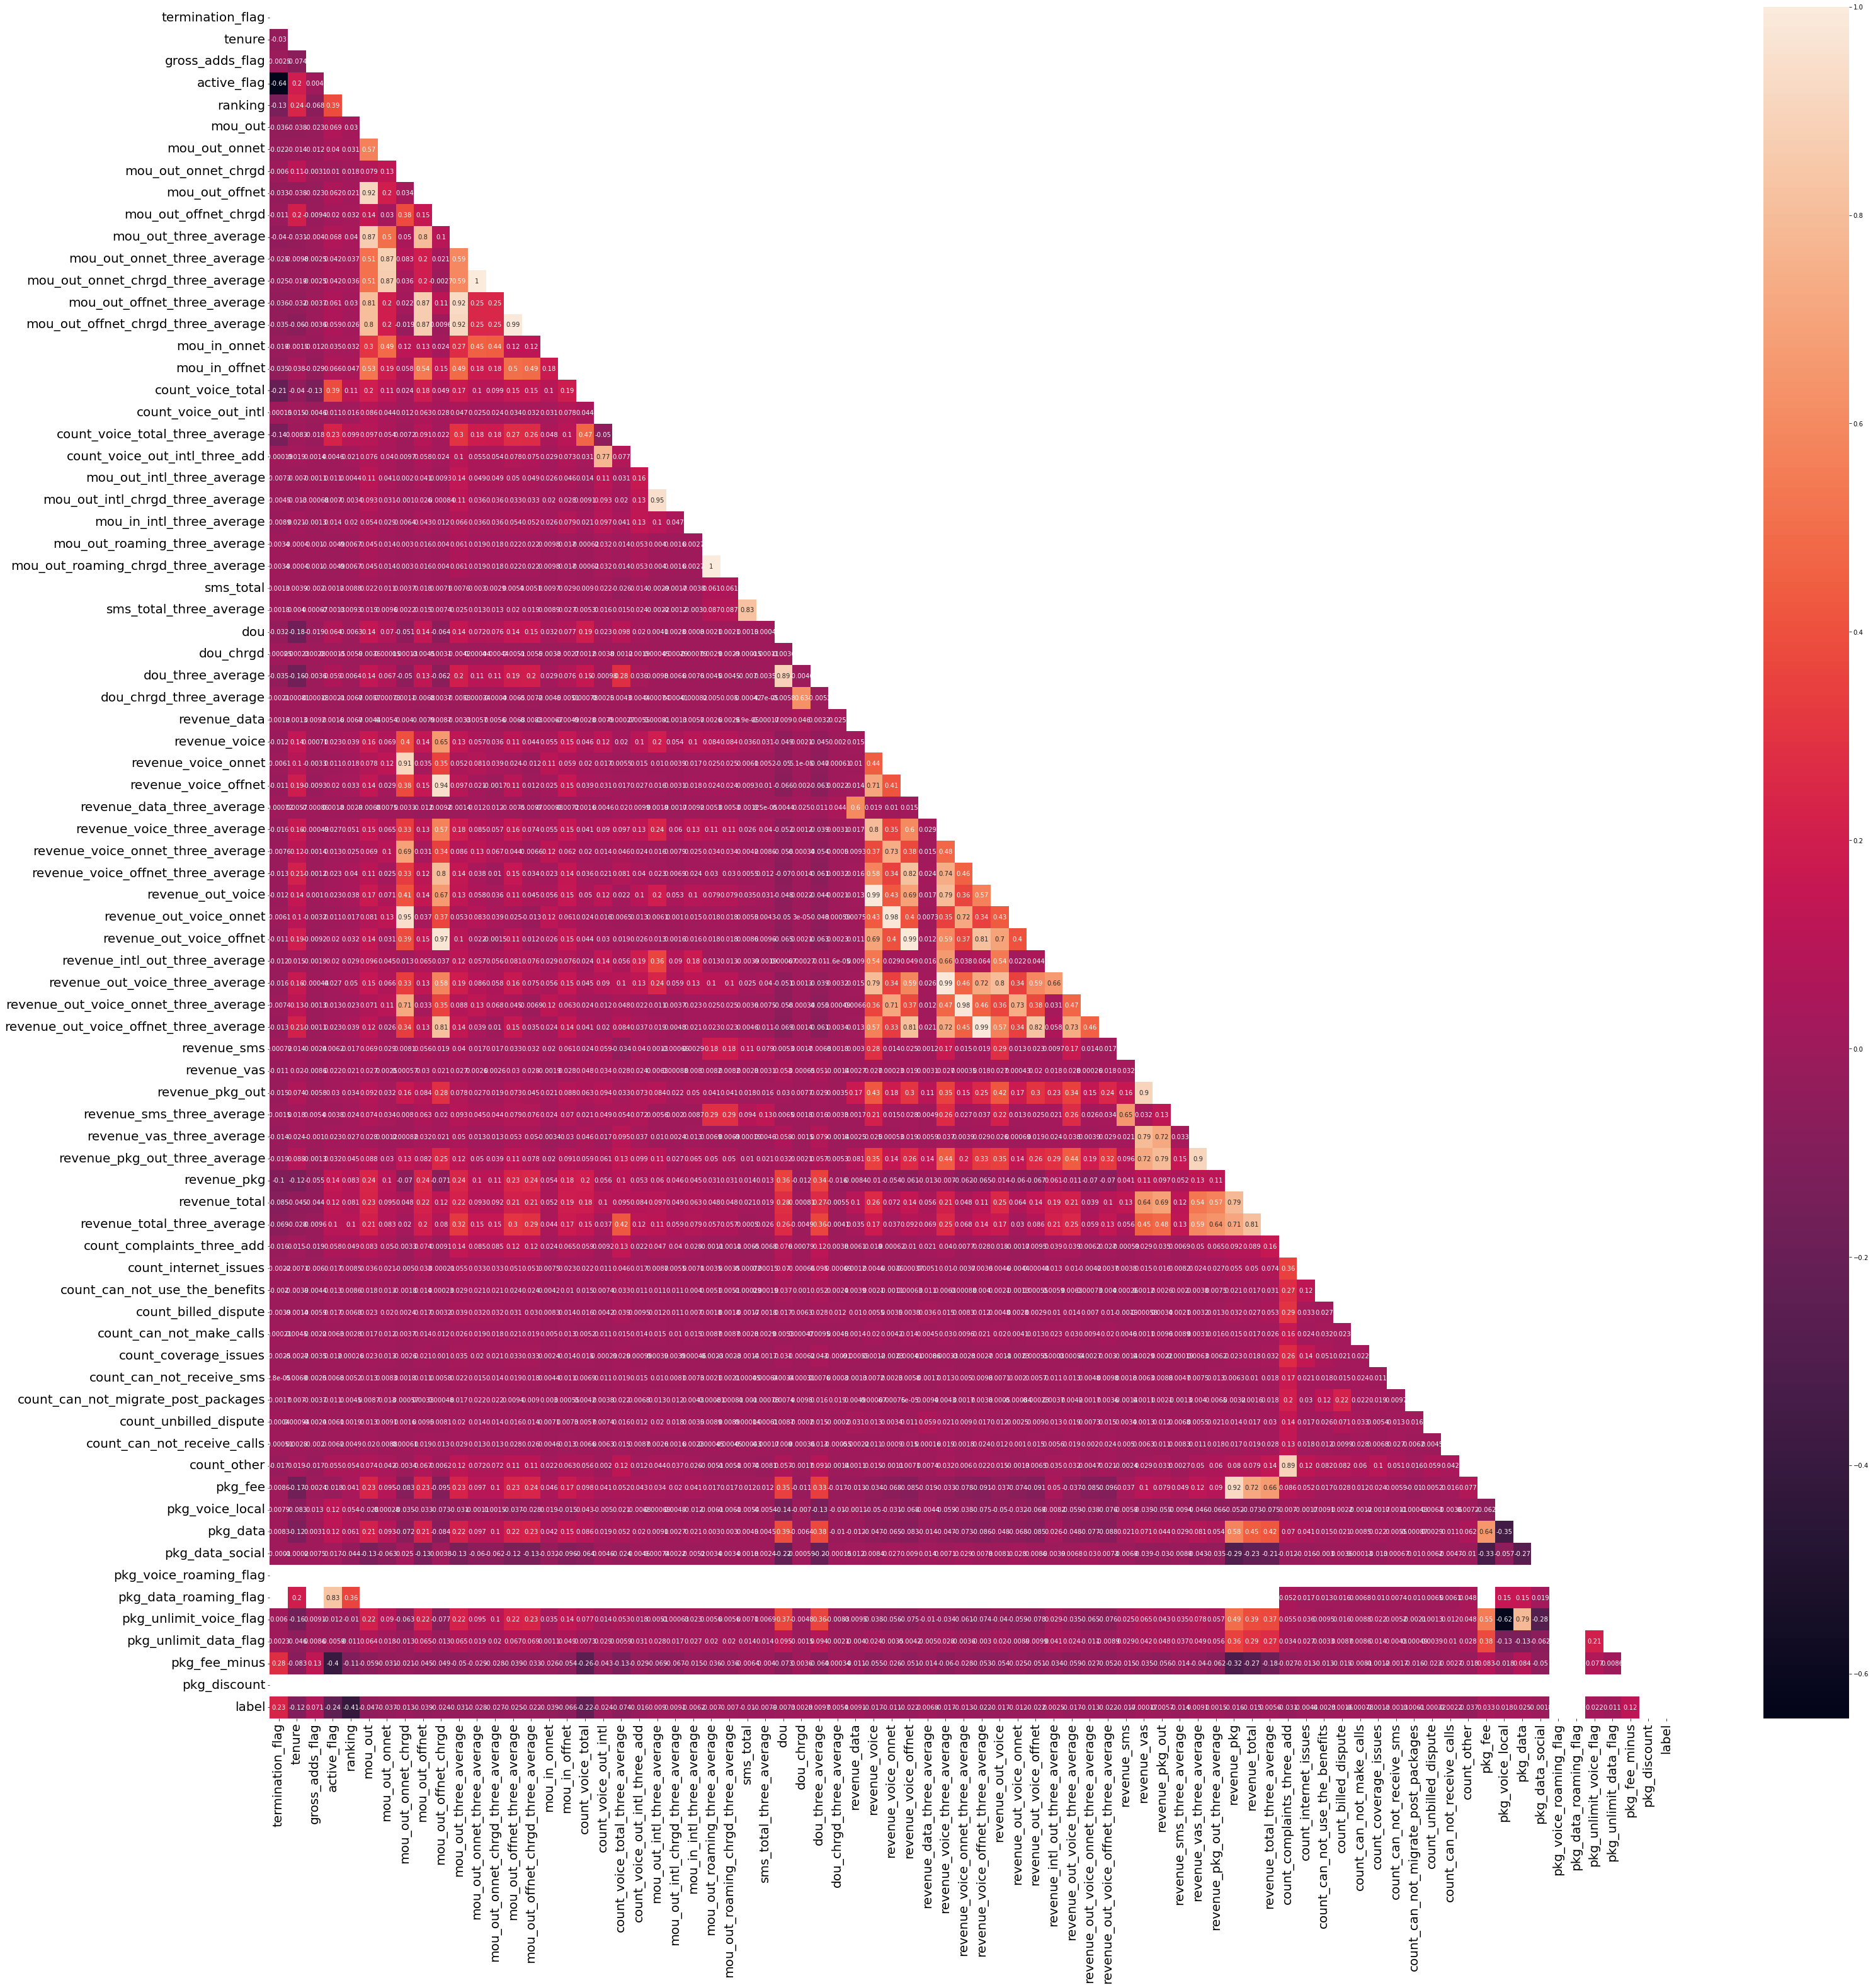

In [56]:
mask = np.zeros_like(df_selected_numerical.corr())
tri_indices = np.triu_indices_from(mask)
mask[tri_indices] = True
plt.figure(figsize=(50,50))
plt.xticks(fontsize= 20)
sns.heatmap(df_selected_numerical.corr(), mask= mask, annot= True)
plt.yticks(fontsize= 20)
plt.show()


In [84]:
df_selected_numerical_after_threshhold= df_selected_numerical.corr()["label"].abs()[df_selected_numerical.corr()["label"].abs()>=0.02]
len(df_selected_numerical_after_threshhold)


30

In [86]:
selected_numerical_columns_list = []
for i in df_selected_numerical.columns:
    if i in df_selected_numerical_after_threshhold:
        selected_numerical_columns_list.append(i)

df_selected_numerical = df_selected_numerical[selected_numerical_columns_list]
print(df_selected_numerical.columns)
print(df_selected_nominal.columns)

Index(['termination_flag', 'tenure', 'gross_adds_flag', 'active_flag',
       'ranking', 'mou_out', 'mou_out_onnet', 'mou_out_offnet',
       'mou_out_offnet_chrgd', 'mou_out_three_average',
       'mou_out_onnet_three_average', 'mou_out_onnet_chrgd_three_average',
       'mou_out_offnet_three_average', 'mou_out_offnet_chrgd_three_average',
       'mou_in_onnet', 'mou_in_offnet', 'count_voice_total',
       'count_voice_out_intl', 'count_voice_total_three_average',
       'revenue_voice_offnet', 'revenue_voice_offnet_three_average',
       'revenue_out_voice_offnet', 'revenue_out_voice_offnet_three_average',
       'count_complaints_three_add', 'count_other', 'pkg_fee', 'pkg_data',
       'pkg_unlimit_voice_flag', 'pkg_fee_minus', 'label'],
      dtype='object')
Index(['sales_channel_type', 'city', 'device_manufacturer', 'device_type',
       'device_tech', 'top_intl_destination', 'nationality'],
      dtype='object')


In [59]:
grouped_city =  df_selected_nominal.groupby("city")["city"].agg('count').sort_values(ascending= False)
grouped_city_less = grouped_city[grouped_city<10000]
df_selected_nominal.city = df_selected_nominal.city.apply(lambda x: "other" if x in grouped_city_less else x)
df_selected_nominal.city.value_counts()

Riyadh            327094
other             183035
Jeddah            115806
Dammam             81392
Madinah            64162
Ahsa               45783
Makkah             43184
Khobar             35940
Taif               22307
Buraydah           21474
Tabuk              20033
Hail               19249
Khamis Mushait     17410
Jubail             16675
Abha               14812
Yanbou             10953
Name: city, dtype: int64

In [60]:
grouped_sales_channel_type =  df_selected_nominal.groupby("sales_channel_type")["sales_channel_type"].agg('count').sort_values(ascending= False)
grouped_sales_channel_types_less = grouped_sales_channel_type[grouped_sales_channel_type<10000]
df_selected_nominal.sales_channel_type = df_selected_nominal.sales_channel_type.apply(lambda x: "other" if x in grouped_sales_channel_types_less else x)
df_selected_nominal.sales_channel_type.value_counts()

FBO         573807
FLAGSHIP    286992
DISABLED     37394
DIRECT       33759
other        32404
SSHOPS       30061
KIOSK        25188
ZKIOSK       22692
SKIOSK       14115
-1           13151
SCS          12726
AIPS         11395
Name: sales_channel_type, dtype: int64

In [61]:
grouped_device_manufacturer =  df_selected_nominal.groupby("device_manufacturer")["device_manufacturer"].agg('count').sort_values(ascending= False)
grouped_device_manufacturer_less = grouped_device_manufacturer[grouped_device_manufacturer<10000]
df_selected_nominal.device_manufacturer = df_selected_nominal.device_manufacturer.apply(lambda x: "other" if x in grouped_device_manufacturer_less else x)
df_selected_nominal.device_manufacturer.value_counts()


Apple            616416
Samsung          214542
Huawei           205813
other             50685
Hmd Global Oy     21374
Name: device_manufacturer, dtype: int64

In [62]:
grouped_device_type =  df_selected_nominal.groupby("device_type")["device_type"].agg('count').sort_values(ascending= False)
grouped_device_type_less = grouped_device_type[grouped_device_type<3000]
df_selected_nominal.device_type = df_selected_nominal.device_type.apply(lambda x: "other" if x in grouped_device_type_less else x)
df_selected_nominal.device_type.value_counts()

Phablet          898909
Smartphone       174775
Basic Phone       16866
Feature Phone      7633
Router             5681
Tablet             3449
other              1517
Name: device_type, dtype: int64

In [63]:
df_selected_nominal.device_tech = df_selected_nominal.device_tech.apply(lambda x: "other" if (x=="0" or x=="UNKNOWN") else x)
df_selected_nominal.device_tech.value_counts()


4G       1023338
5G         51950
2G         23813
3G          8836
other        887
Name: device_tech, dtype: int64

In [64]:
grouped_top_intl_destination =  df_selected_nominal.groupby("top_intl_destination")["top_intl_destination"].agg('count').sort_values(ascending= False)
grouped_top_intl_destination_less = grouped_top_intl_destination[grouped_top_intl_destination<3000]
df_selected_nominal.top_intl_destination = df_selected_nominal.top_intl_destination.apply(lambda x: "other" if x in grouped_top_intl_destination_less else x)
df_selected_nominal.top_intl_destination.value_counts()

UNKNOWN                 184162
Egypt                    43885
other                    27515
United Arab Emirates     18844
Pakistan                 11552
Yemen                    10650
Sudan                    10528
Jordan                    7692
India                     7518
Syrian Arab Republic      6250
Kuwait                    5838
Bahrain                   4455
Tunisia                   4328
USA                       4178
Morocco                   3224
Philippines               3217
Qatar                     3205
Name: top_intl_destination, dtype: int64

In [65]:
grouped_nationality =  df_selected_nominal.groupby("nationality")["nationality"].agg('count').sort_values(ascending= False)
grouped_nationality_less = grouped_nationality[grouped_nationality<3000]
df_selected_nominal.nationality = df_selected_nominal.nationality.apply(lambda x: "other" if x in grouped_nationality_less else x)
df_selected_nominal.nationality.value_counts()

Saudi Arabia            775594
Egypt                    83423
Pakistan                 37385
India                    35432
Yemen                    34739
Syria                    34433
other                    26667
Jordan                   21336
Sudan                    17623
Philippines              15926
Bangladesh                8416
Lebanon                   5434
Palestine                 5043
UNKNOWN                   3941
United Arab Emirates      3559
Name: nationality, dtype: int64

In [66]:
df_selected_nominal= df_selected_nominal.fillna("other")
df_selected_nominal

,sales_channel_type,city,device_manufacturer,device_type,device_tech,top_intl_destination,nationality
0,FBO,Makkah,Apple,Phablet,4G,other,Saudi Arabia
1,FBO,Jeddah,Apple,Phablet,5G,other,Egypt
2,FLAGSHIP,Jeddah,Samsung,Phablet,4G,other,Pakistan
3,DIRECT,Dammam,other,other,other,other,Saudi Arabia
4,FBO,Buraydah,Apple,Phablet,4G,other,Saudi Arabia
...,...,...,...,...,...,...,...
1144102,ZKIOSK,other,Apple,Smartphone,4G,UNKNOWN,Saudi Arabia
1144103,FLAGSHIP,Ahsa,Samsung,Phablet,4G,UNKNOWN,Saudi Arabia
1144104,FBO,Dammam,Huawei,Smartphone,5G,UNKNOWN,Saudi Arabia
1144105,ZKIOSK,Riyadh,Apple,Phablet,4G,UNKNOWN,Saudi Arabia


In [67]:
df_selected_nominal.isna().sum()

sales_channel_type      0
city                    0
device_manufacturer     0
device_type             0
device_tech             0
top_intl_destination    0
nationality             0
dtype: int64

In [68]:
df_selected_numerical.tenure

0          30.700000
1          24.366667
2          13.733334
3          17.366667
4          43.566666
             ...    
1144102     8.064516
1144103    28.290323
1144104    21.709677
1144105    53.096775
1144106    22.645160
Name: tenure, Length: 1144107, dtype: float64

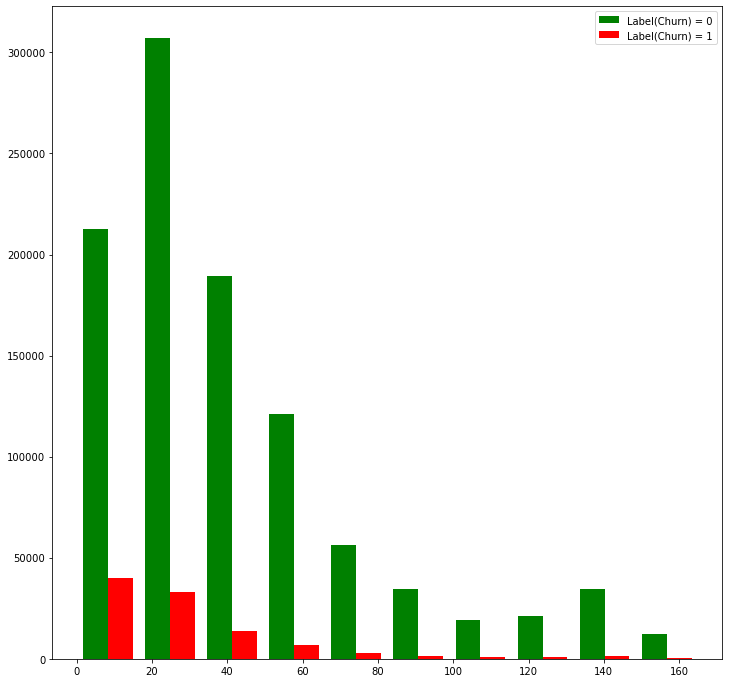

In [82]:
label_0= df_selected_numerical[df_selected_numerical.label==0.0].tenure
label_1= df_selected_numerical[df_selected_numerical.label==1.0].tenure
plt.figure(figsize= (12,12))
plt.hist([label_0, label_1], color=["green", "red"], label=["Label(Churn) = 0", "Label(Churn) = 1"])
plt.legend()
plt.show()


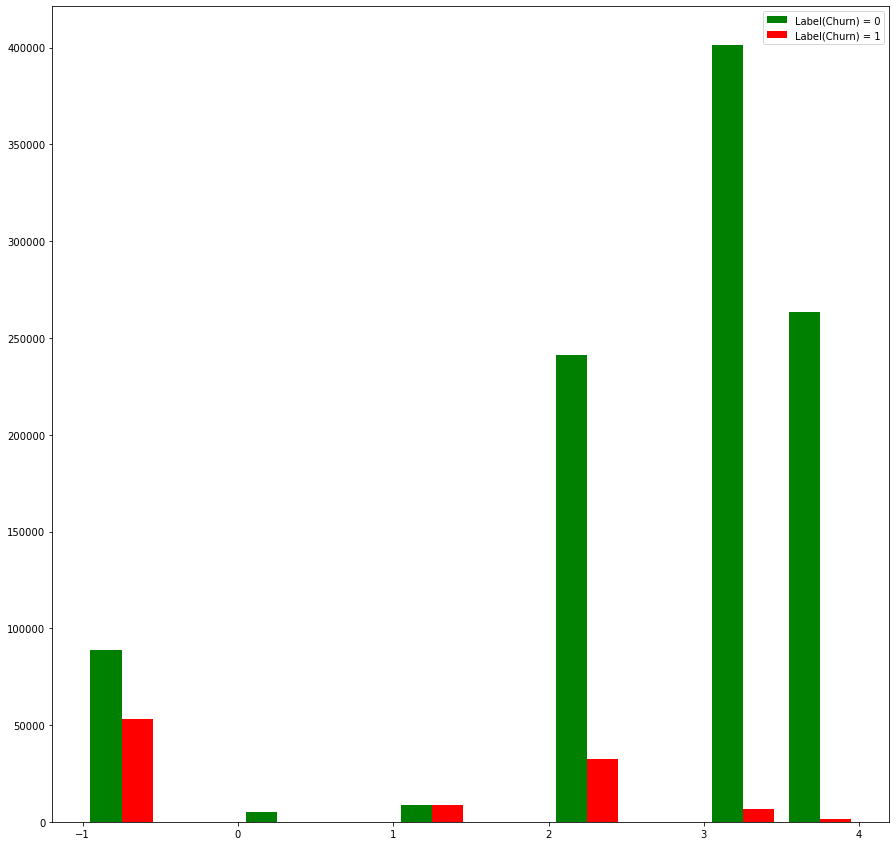

In [70]:
label_0= df_selected_numerical[df_selected_numerical.label==0.0].ranking
label_1= df_selected_numerical[df_selected_numerical.label==1.0].ranking
plt.figure(figsize= (15,15))
plt.hist([label_0, label_1], color=["green", "red"], label=["Label(Churn) = 0", "Label(Churn) = 1"])
plt.legend()
plt.show()


In [71]:
df_selected_numerical.isna().sum()


termination_flag                           33325
tenure                                         0
gross_adds_flag                            33325
active_flag                                    0
ranking                                        0
mou_out                                    33325
mou_out_onnet                              33325
mou_out_offnet                             33325
mou_out_offnet_chrgd                       33325
mou_out_three_average                     311248
mou_out_onnet_three_average               311248
mou_out_onnet_chrgd_three_average         311248
mou_out_offnet_three_average              311248
mou_out_offnet_chrgd_three_average        311248
mou_in_onnet                               33325
mou_in_offnet                              33325
count_voice_total                          33325
count_voice_out_intl                       33325
count_voice_total_three_average           311248
revenue_voice_offnet                       33325
revenue_voice_offnet

In [72]:
df_selected_numerical_label_na_dropped= df_selected_numerical[df_selected_numerical['label'].notna()]
df_selected_numerical_label_na_dropped

,termination_flag,tenure,gross_adds_flag,active_flag,ranking,mou_out,mou_out_onnet,mou_out_offnet,mou_out_offnet_chrgd,mou_out_three_average,mou_out_onnet_three_average,mou_out_onnet_chrgd_three_average,mou_out_offnet_three_average,mou_out_offnet_chrgd_three_average,mou_in_onnet,mou_in_offnet,count_voice_total,count_voice_out_intl,count_voice_total_three_average,revenue_voice_offnet,revenue_voice_offnet_three_average,revenue_out_voice_offnet,revenue_out_voice_offnet_three_average,count_complaints_three_add,count_other,pkg_fee,pkg_data,pkg_unlimit_voice_flag,pkg_fee_minus,label
0,0.0,30.700000,0.0,1.0,4,10427.0,4062.0,6365.0,0.0,11242.0,3274.0,3274.0,7967.0,6966.0,2949.0,17994.0,30.0,0.0,29.0,0.0,5.25,0.0,5.25,1,0.0,140.0,10.0,0.0,0.00,0.0
1,0.0,24.366667,0.0,1.0,4,51030.0,11383.0,39647.0,0.0,43642.0,11299.0,11299.0,32237.0,32237.0,2410.0,37389.0,30.0,0.0,29.0,0.0,0.00,0.0,0.00,14,10.0,199.0,95.0,1.0,0.00,0.0
2,0.0,13.733334,0.0,1.0,-1,35527.0,22028.0,13499.0,0.0,46647.0,28342.0,28342.0,18271.0,18088.0,16955.0,12928.0,30.0,0.0,29.0,0.0,1.05,0.0,1.05,1,0.0,199.0,95.0,1.0,0.00,0.0
3,0.0,17.366667,0.0,1.0,2,98623.0,8872.0,89751.0,1660.0,126886.0,9737.0,9737.0,117119.0,114195.0,20766.0,146951.0,30.0,0.0,29.0,9.0,15.55,9.0,15.55,2,2.0,299.0,150.0,1.0,-9.65,0.0
4,0.0,43.566666,0.0,1.0,4,2646.0,2111.0,535.0,0.0,2492.0,1488.0,1488.0,1004.0,947.0,102.0,1781.0,30.0,1.0,29.0,0.0,0.35,0.0,0.35,3,2.0,499.0,200.0,1.0,-50.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144102,0.0,8.064516,0.0,1.0,2,580.0,0.0,580.0,0.0,193.0,0.0,0.0,193.0,193.0,0.0,13.0,12.0,8.0,6.0,0.0,0.00,0.0,0.00,0,0.0,199.0,95.0,1.0,139.30,0.0
1144103,0.0,28.290323,0.0,1.0,4,1725.0,116.0,1609.0,0.0,1141.0,121.0,121.0,1020.0,1020.0,104.0,6379.0,30.0,20.0,29.0,0.0,0.00,0.0,0.00,0,0.0,399.0,100.0,1.0,-25.00,0.0
1144104,0.0,21.709677,0.0,1.0,2,40073.0,3937.0,36136.0,0.0,51972.0,1589.0,1589.0,50383.0,50383.0,1669.0,27319.0,31.0,0.0,30.0,0.0,0.00,0.0,0.00,0,0.0,399.0,-1.0,1.0,0.00,0.0
1144105,0.0,53.096775,0.0,1.0,3,4679.0,2728.0,1951.0,0.0,4610.0,2454.0,2454.0,2155.0,1702.0,4433.0,5795.0,31.0,1.0,30.0,0.0,2.50,0.0,2.50,0,0.0,199.0,95.0,1.0,0.00,0.0


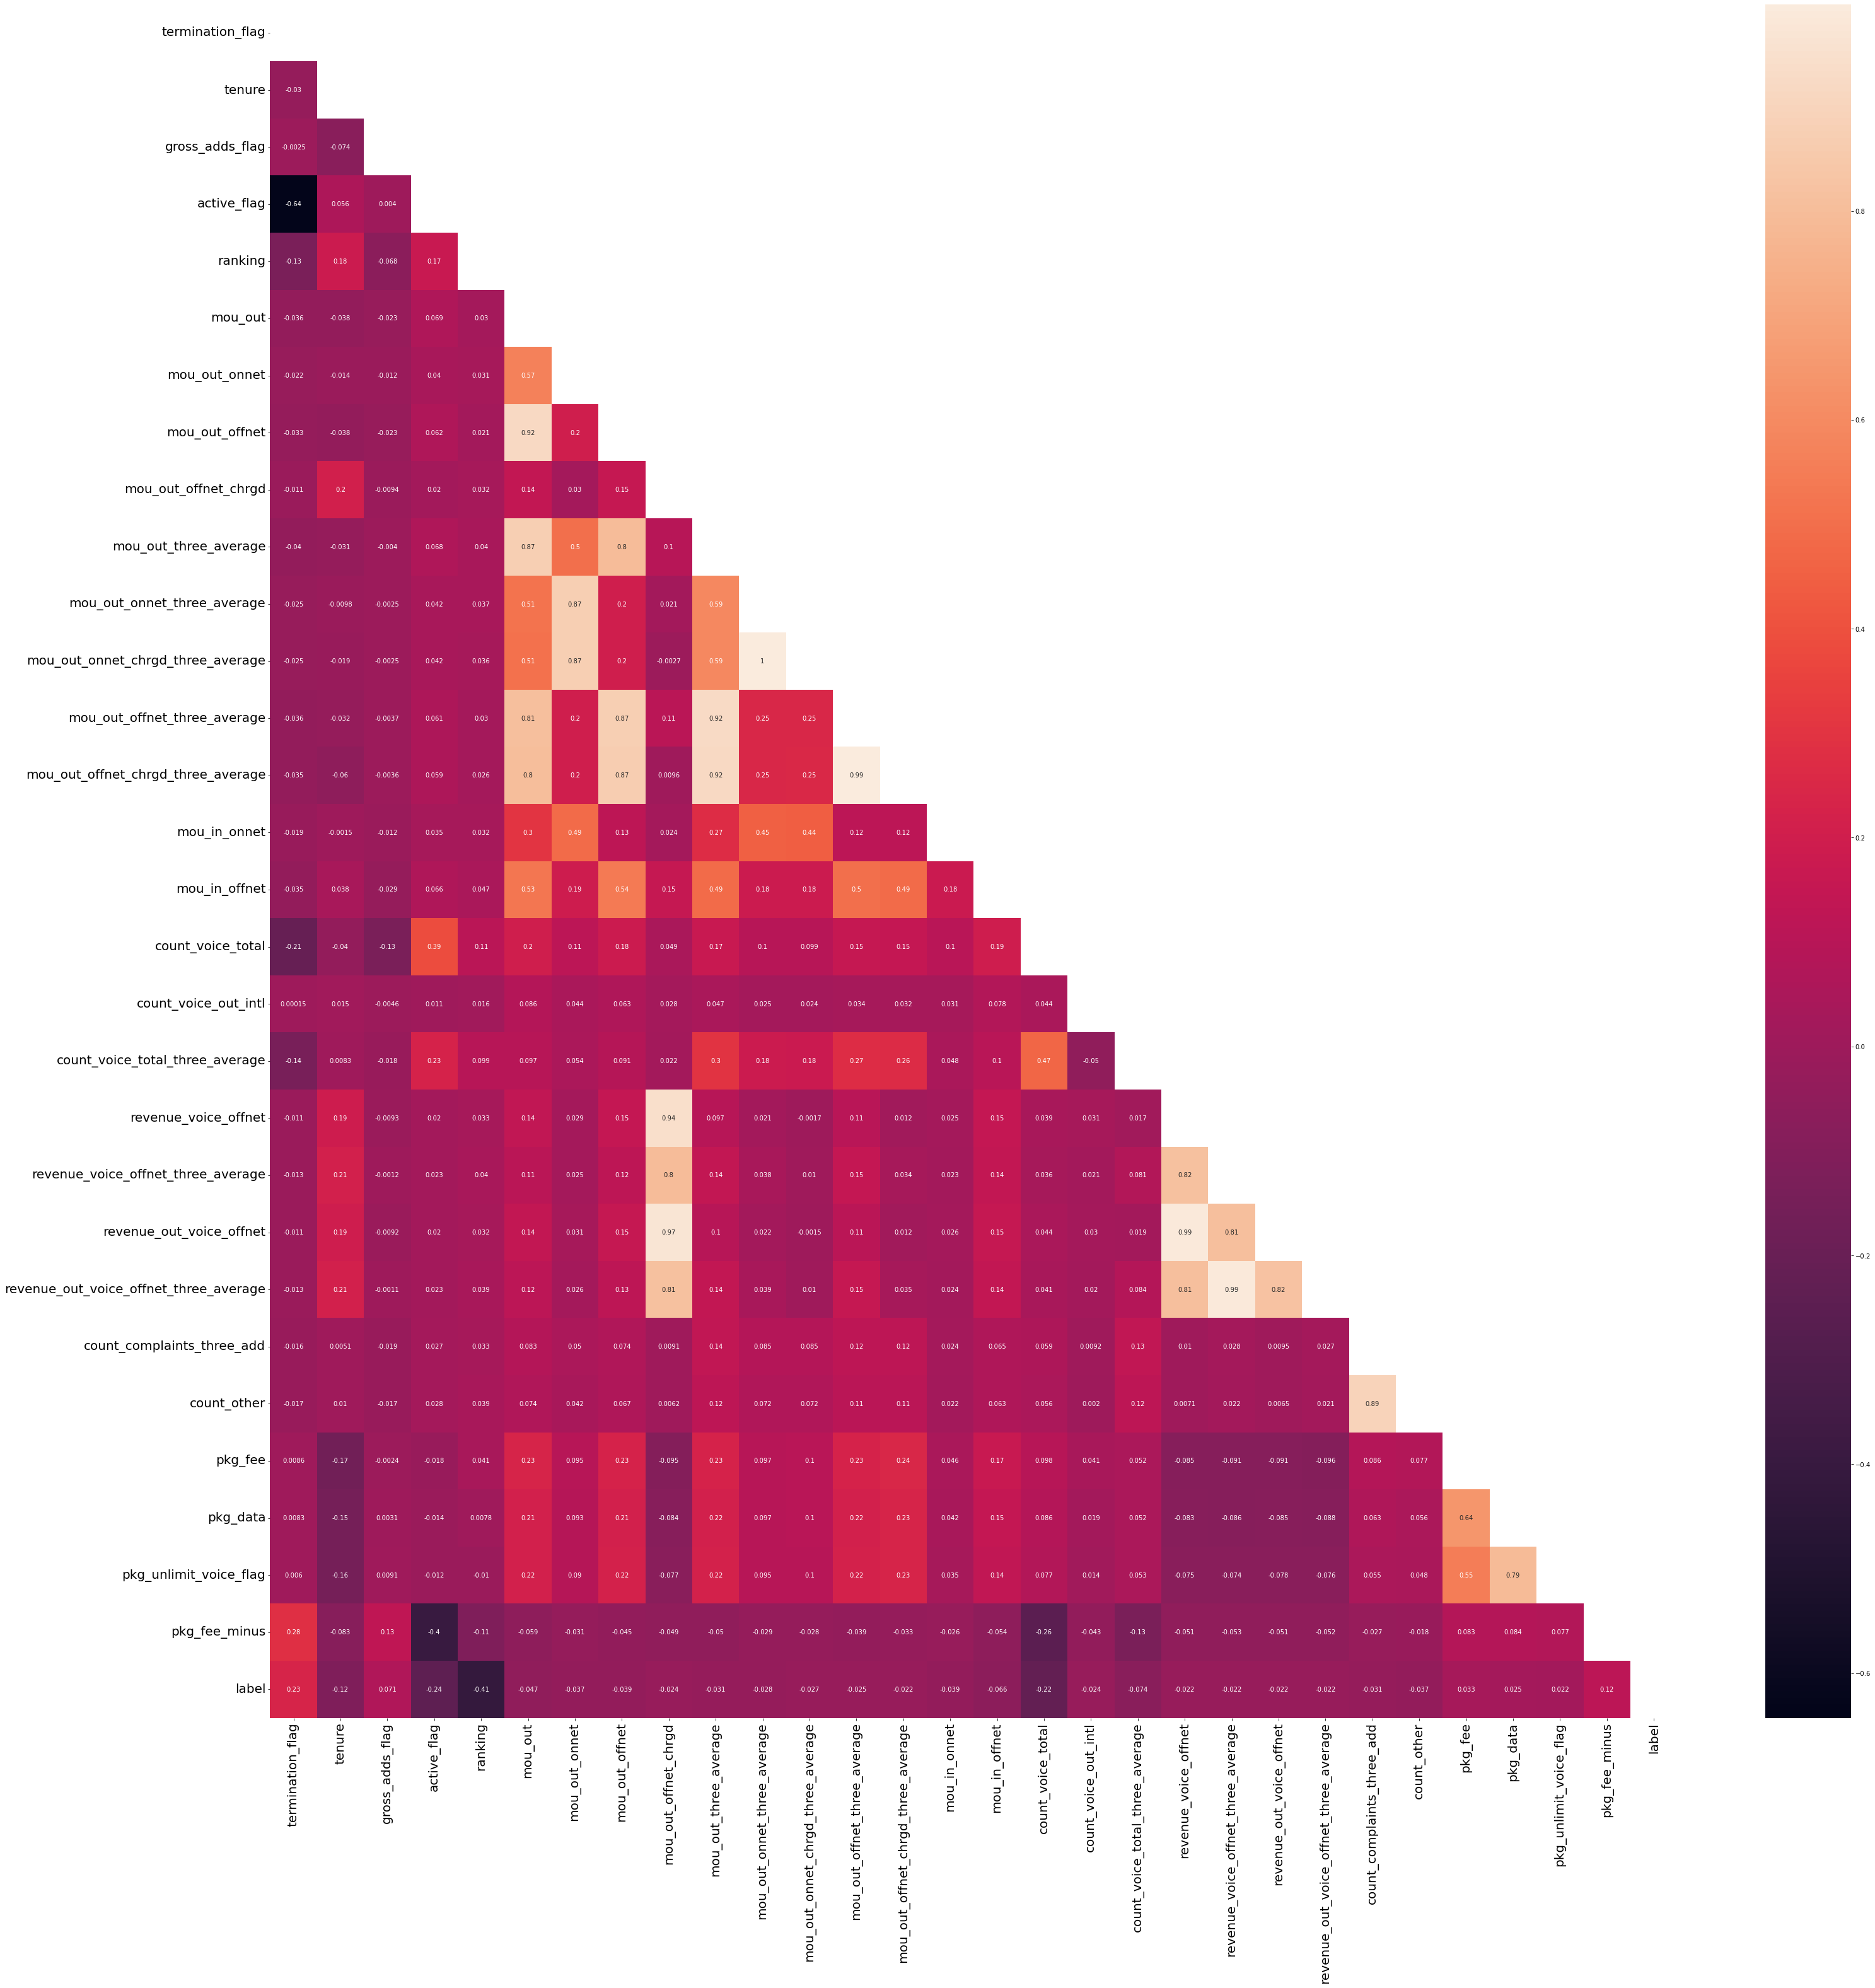

In [73]:
mask = np.zeros_like(df_selected_numerical_label_na_dropped.corr())
tri_indices = np.triu_indices_from(mask)
mask[tri_indices] = True
plt.figure(figsize=(50,50))
plt.xticks(fontsize= 20)
sns.heatmap(df_selected_numerical_label_na_dropped.corr(), mask= mask, annot= True)
plt.yticks(fontsize= 20)
plt.show()

In [74]:
df_selected_numerical_label_na_dropped_correlations= df_selected_numerical_label_na_dropped.corr().abs()
flatten_correlations = df_selected_numerical_label_na_dropped_correlations.unstack()
sorted_flatten_correlations = flatten_correlations[flatten_correlations.values<1].sort_values(kind="quicksort", ascending=False)
with pd.option_context('display.max_rows', 10000, 'display.max_columns', 100):
    print(sorted_flatten_correlations[sorted_flatten_correlations>0.7].drop_duplicates(keep="first"))


mou_out_onnet_chrgd_three_average       mou_out_onnet_three_average               0.997958
mou_out_offnet_three_average            mou_out_offnet_chrgd_three_average        0.992550
revenue_voice_offnet_three_average      revenue_out_voice_offnet_three_average    0.988153
revenue_voice_offnet                    revenue_out_voice_offnet                  0.985953
revenue_out_voice_offnet                mou_out_offnet_chrgd                      0.968560
mou_out_offnet_chrgd                    revenue_voice_offnet                      0.943267
mou_out_offnet_three_average            mou_out_three_average                     0.923009
mou_out_three_average                   mou_out_offnet_chrgd_three_average        0.916088
mou_out_offnet                          mou_out                                   0.915132
count_complaints_three_add              count_other                               0.894337
mou_out_onnet                           mou_out_onnet_three_average               0.872323

In [141]:

top_sorted = sorted_flatten_correlations[sorted_flatten_correlations>0.7].drop_duplicates(keep="first")
print(len(top_sorted.values))
groups = []
for indexes in top_sorted.index:
    temp = [indexes]
    for again in top_sorted.index:
        if((indexes[0]==again[0] and indexes[1]!=again[1]) or (indexes[1]==again[1] and indexes[0]!=again[0]) or 
        (indexes[0]==again[1] and indexes[1]!=again[0]) or (indexes[1]==again[0] and indexes[0]!=again[1])):
            temp.append(again)
    groups.append(temp)
print(len(groups))
groups_list =  []
for group in groups:
    temp  = []
    for tuples in group:
        for value in tuples:
            if value not in temp:
                temp.append(value)
    groups_list.append(temp)
for i in groups_list:
    i.sort()
duplicates = []
seen = []
for i in groups_list:
    if i in seen:
        duplicates.append(i)
    else:
        seen.append(i)

print("duplicates")
duplicates.sort()
for duplicate in duplicates:
    print(duplicate)
print(len(duplicates))

25
25
duplicates
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out

In [142]:
groups_list.sort()
for i in groups_list:
    print(i)

['count_complaints_three_add', 'count_other']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_offnet_three_average', 'mou_out_three_average']
['mou_out', 'mou_out_offnet', 'mou_out_offnet_chrgd_three_average', 'mou_out_of

In [75]:
all_connected_df = all_data_df[all_data_df["line_status"]=="Connected"]
all_connected_df[all_connected_df["label"]==1][["line_status", "label"]]

,line_status,label
8,Connected,1.0
10,Connected,1.0
16,Connected,1.0
27,Connected,1.0
39,Connected,1.0
...,...,...
1143974,Connected,1.0
1143999,Connected,1.0
1144003,Connected,1.0
1144043,Connected,1.0


In [76]:
sorted_flatten_correlations_greater= sorted_flatten_correlations[sorted_flatten_correlations>0.7].drop_duplicates(keep="first")

In [77]:
sorted_flatten_correlations_greater_reset_index= sorted_flatten_correlations_greater.reset_index()

In [78]:
sorted_flatten_correlations_greater_reset_index.sort_values("level_0")

,level_0,level_1,0
9,count_complaints_three_add,count_other,0.894337
21,mou_out,mou_out_offnet_chrgd_three_average,0.801789
19,mou_out,mou_out_offnet_three_average,0.806768
22,mou_out_offnet,mou_out_three_average,0.796710
14,mou_out_offnet,mou_out_offnet_chrgd_three_average,0.865403
8,mou_out_offnet,mou_out,0.915132
11,mou_out_offnet,mou_out_offnet_three_average,0.870943
5,mou_out_offnet_chrgd,revenue_voice_offnet,0.943267
23,mou_out_offnet_chrgd,revenue_voice_offnet_three_average,0.795418
1,mou_out_offnet_three_average,mou_out_offnet_chrgd_three_average,0.992550


In [79]:
sorted_flatten_correlations_greater_reset_index.dtypes

level_0     object
level_1     object
0          float64
dtype: object

In [80]:
df_selected_numerical_label_na_dropped_correlations.dtypes

termination_flag                          float64
tenure                                    float64
gross_adds_flag                           float64
active_flag                               float64
ranking                                   float64
mou_out                                   float64
mou_out_onnet                             float64
mou_out_offnet                            float64
mou_out_offnet_chrgd                      float64
mou_out_three_average                     float64
mou_out_onnet_three_average               float64
mou_out_onnet_chrgd_three_average         float64
mou_out_offnet_three_average              float64
mou_out_offnet_chrgd_three_average        float64
mou_in_onnet                              float64
mou_in_offnet                             float64
count_voice_total                         float64
count_voice_out_intl                      float64
count_voice_total_three_average           float64
revenue_voice_offnet                      float64


In [81]:
df_selected_nominal.columns

Index(['sales_channel_type', 'city', 'device_manufacturer', 'device_type',
       'device_tech', 'top_intl_destination', 'nationality'],
      dtype='object')